<h2>Load Data</h2>
<h5><b>NOTE:</b> csv file change maually and price column moved to the last column</h5>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

In [4]:
# Load data
df = pd.read_csv('.\\car_details_v4.csv')

# Split features and lables (prices)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

<h2>Show some features</h2>
<ul>
    <li>Price</li>
    <li>Sitting Capisity</li>
    <li>Year</li>
    <li>Height</li>
    <li>Lenght</li>
    <li>Width</li>
</ul>

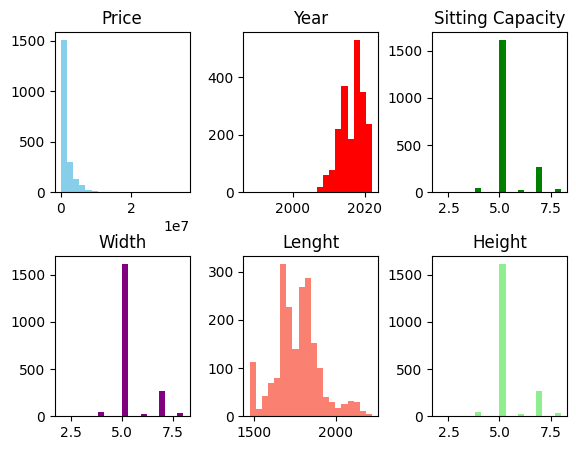

In [5]:
prices = y.values
years = df['Year'].values
siting = df['Seating Capacity'].values
widths = df['Width'].values
heights = df['Height'].values
lenghts = df['Length'].values

# Prices
plt.subplot(2, 3, 1)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
prices_hist = plt.hist(prices, bins=20, color='skyblue')
plt.title("Price")

# Years
plt.subplot(2, 3, 2)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
years_hist = plt.hist(years, bins=20, color='red')
plt.title("Year")

# Sitting Capacity
plt.subplot(2, 3, 3)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
makes_hist = plt.hist(siting, bins=20, color='green')
plt.title("Sitting Capacity")

# Widths
plt.subplot(2, 3, 4)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
makes_hist = plt.hist(siting, bins=20, color='purple')
plt.title("Width")

# Lenghts
plt.subplot(2, 3, 5)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
makes_hist = plt.hist(widths, bins=20, color='salmon')
plt.title("Lenght")

# Heights
plt.subplot(2, 3, 6)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
makes_hist = plt.hist(siting, bins=20, color='lightgreen')
plt.title("Height")

plt.show()

<h2>Missing Values</h2>
<h4>Statistics (Before Handling)</h4>

In [6]:
print(df.isnull().sum())

Make                    0
Model                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
Price                   0
dtype: int64


<h2>Missing Values</h2>
<h4>Diagram (Before Handling)</h4>

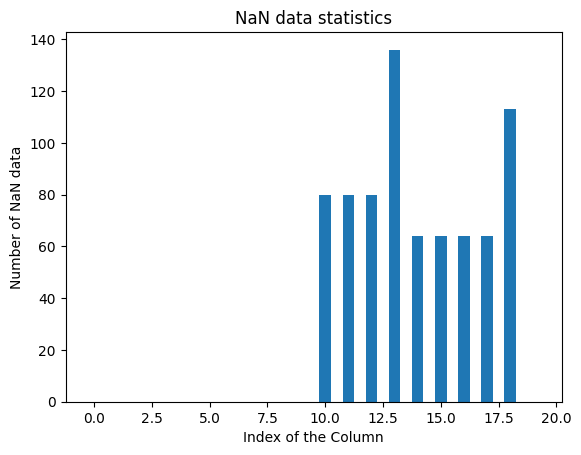

In [7]:
nan_list = df.isnull().sum().values
plt.bar([i for i in range(len(df.columns))], nan_list, width=0.5, align='center')
plt.xlabel("Index of the Column")
plt.ylabel("Number of NaN data")
plt.title("NaN data statistics")
plt.show()

<h2>Missing Values</h2>
<h4>Handling numeric and non-numeric missing values</h4>
<h5>Numeric Values</h5>
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>height</li>
    <li>Fuel Tank Capacity</li>
    <li>Sitting Capacity</li>
    <li>Engine</li>
    <li>Max Power</li>
    <li>Max Torque</li>
</ul>
<h5>Non-Numeric Values</h5>
<ul>
    <li>Drivetrain</li>
</ul>
<h4><b>NOTE:</b> Selected method is to replace missing values with the mean of rest data</h4>

In [10]:
# Numeric Values
# Length
df['Length'] = df['Length'].fillna(df['Length'].mean())

# Width
df['Width'] = df['Width'].fillna(df['Width'].mean())

# Height
df['Height'] = df['Height'].fillna(df['Height'].mean())

# Fuel Tank Capacity
df['Fuel Tank Capacity'] = df['Fuel Tank Capacity'].fillna(df['Fuel Tank Capacity'].mean())

# Seating Capacity
df['Seating Capacity'] = df['Seating Capacity'].fillna(df['Seating Capacity'].mean())

# Engine
import copy
df_copy = copy.deepcopy(df)
engines = list(df_copy['Engine'].values)

for i in range(len(engines)):
    if type(engines[i]) == str:
        c_index = engines[i].find('c')
        engines[i] = int(engines[i][:c_index])

df_copy['Engine'] = np.array(engines)
df_copy['Engine'] = df_copy['Engine'].fillna(df_copy['Engine'].mean())

# Max Power
max_powers = copy.deepcopy(df_copy['Max Power'].values)
df_copy['Max Power'] = df_copy['Max Power'].fillna(np.random.choice(max_powers, size=1)[0])

# Max Torque
max_torques = copy.deepcopy(df_copy['Max Torque'].values)
df_copy['Max Torque'] = df_copy['Max Torque'].fillna(np.random.choice(max_torques, size=1)[0])

# Non-numeric Values
# Drivetrain
drivetrains = copy.deepcopy(df_copy['Drivetrain'].values)
df_copy['Drivetrain'] = df_copy['Drivetrain'].fillna(np.random.choice(drivetrains, size=1)[0])

# Set df again
# Worked with the copy version of df to do not change main data set
df = copy.deepcopy(df_copy)

<h2>Missing Values</h2>
<h4>Statistics (After Handling)</h4>

In [11]:
print(df.isnull().sum())

Make                  0
Model                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Price                 0
dtype: int64


<h2>Encoding categorical data</h2>
<ul>
    <li>Model</li>
    <li>Make</li>
    <li>Fuel Type</li>
    <li>Transmission</li>
    <li>Location</li>
    <li>Color</li>
    <li>Owner</li>
    <li>Seller Type</li>
    <li>Drivetrain</li>
</ul>

In [12]:
label_encoder = LabelEncoder()
df['Model'] = label_encoder.fit_transform(df['Model'])
df['Make'] = label_encoder.fit_transform(df['Make'])
df['Fuel Type'] = label_encoder.fit_transform(df['Fuel Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Color'] = label_encoder.fit_transform(df['Color'])
df['Owner'] = label_encoder.fit_transform(df['Owner'])
df['Seller Type'] = label_encoder.fit_transform(df['Seller Type'])
df['Drivetrain'] = label_encoder.fit_transform(df['Drivetrain'])


<h2>Changing semi-categorical data</h2>
<ul>
    <li>Max Power</li>
    <li>Max Torque</li>
</ul>
<h4><b>NOTE:</b> Two numbers in these columns are concanate to each other and then cast to integer</h4>

In [13]:
import re
# Max Power
max_powers = list(max_powers)
max_powers_edited = []
for i in range(len(max_powers)):
    temp = re.findall('[0-9]+', str(max_powers[i]))
    if len(temp) >= 2:
        num1 = copy.deepcopy(temp[0])
        num2 = copy.deepcopy(temp[1])
        num3 = int(num1 + num2)
        max_powers_edited.append(num3)
    else:
        num3 = int(num1)
        max_powers_edited.append(num3)

df['Max Power'] = np.array(max_powers_edited)

# Result
print("Max Power Column")
print(df['Max Power'])
    
# Max Torque
max_torques = list(max_torques)
max_torques_edited = []
for i in range(len(max_torques)):
    temp = re.findall('[0-9]+', str(max_torques[i]))
    if len(temp) >= 2:
        num1 = copy.deepcopy(temp[0])
        num2 = copy.deepcopy(temp[1])
        num3 = int(num1 + num2)
        max_torques_edited.append(num3)
    else:
        num3 = int(num1)
        max_torques_edited.append(num3)
df['Max Torque'] = np.array(max_torques_edited)

# Result
print("Max Torques Column")
print(df['Max Torque'])



Max Power Column
0        876000
1        744000
2        796000
3        826000
4       1483400
         ...   
2054    1383750
2055     555500
2056     706250
2057    1884000
2058     703600
Name: Max Power, Length: 2059, dtype: int32
Max Torques Column
0       1094500
1       1902000
2       1127619
3       1134200
4       3431400
         ...   
2054    3301600
2055     754000
2056    1024000
2057    4001750
2058    1951400
Name: Max Torque, Length: 2059, dtype: int32


<h2>Correlation Matrix</h2>
<ul>
    <li>Correlation data frame</li>
    <li>Correlation heatmap</li>
</ul>

                        Make     Model      Year  Kilometer  Fuel Type  \
Make                1.000000  0.164767  0.028599   0.047267   0.002192   
Model               0.164767  1.000000 -0.033830   0.026484  -0.070626   
Year                0.028599 -0.033830  1.000000  -0.296547  -0.012958   
Kilometer           0.047267  0.026484 -0.296547   1.000000  -0.180255   
Fuel Type           0.002192 -0.070626 -0.012958  -0.180255   1.000000   
Transmission        0.135597  0.196394 -0.171883   0.104907   0.086167   
Location            0.039270 -0.013518 -0.076476   0.034490   0.055145   
Color               0.039078  0.031841 -0.060233   0.061958  -0.030753   
Owner               0.009231 -0.004555 -0.282341   0.090439  -0.055889   
Seller Type        -0.041505 -0.023933 -0.037500   0.025995  -0.019066   
Engine              0.019639 -0.013651 -0.003862   0.061523  -0.330326   
Max Power          -0.126375 -0.081203  0.160643  -0.033176  -0.180510   
Max Torque         -0.088206 -0.039346

<Axes: >

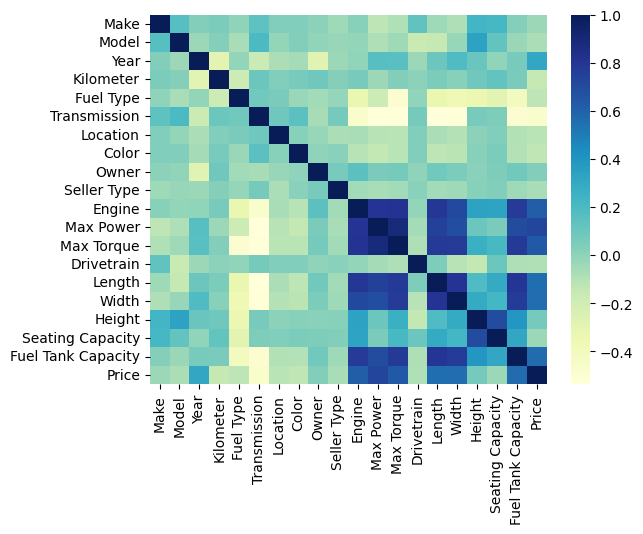

In [14]:
print(df.corr())
corr_mat = df.corr()
sns.heatmap(corr_mat, cmap='YlGnBu')


<h2>Explanation about correlation between features</h2>
<p>Features with high correlation can cause issues for machine learning models because they can introduce multicollinearity, which can lead to unstable estimates of the coefficients. This can make the model sensitive to small changes in the data and can affect the model's interpretability. Additionally, high correlation between features can make the model less generalizable to new data, as it may be overfitting to the training data. Therefore, it's important to identify and handle highly correlated features to ensure the model's performance and interpretability.</p>
<h4>Here are highly correlated features based on heatmap</h4>
<ul>
    <li>Max Torque</li>
    <li>Max Power</li>
    <li>Lenght</li>
    <li>Width</li>
    <li>Fuel Tank Capacity</li>
</ul>
<h5><b>NOTE:</b> With <b>PCA</b> I make a new feature based on these 5 highly correlated features and delete previous columns and add new feature</h5>

In [15]:
pca = PCA(n_components=1)
selected_df = df[['Max Power', 'Max Torque', 'Length', 'Width', 'Fuel Tank Capacity']]
pca_np_array = pca.fit_transform(selected_df)

del df['Max Power']
del df['Max Torque']
del df['Fuel Tank Capacity']
del df['Length']
del df['Width']
df['PCA New Feature'] = pd.DataFrame(pca_np_array)

In [21]:
print(df)
print(df.columns)
temp = df['Price']
del df['Price']
df['Price'] = temp
print(df)
print(df.columns)

      Make  Model  Year  Kilometer  Fuel Type  Transmission  Location  Color  \
0        7    106  2017      87150          6             1        56      7   
1       19    802  2014      75000          2             1        40     15   
2        8   1030  2011      67000          6             1        39      8   
3       30    492  2019      37500          6             1        41     13   
4       30    548  2018      69000          2             1        45      7   
...    ...    ...   ...        ...        ...           ...       ...    ...   
2054    18    999  2016      90300          2             1        67     15   
2055     8    414  2014      83000          6             1         1     15   
2056     6    455  2013      73000          6             1        68     14   
2057     1     13  2018      60474          2             0        12     15   
2058    18    138  2017      72000          2             1        25     15   

      Owner  Seller Type  Engine  Drive

<h2>Normalization</h2>
<h5>Use standard normalization</h5>

In [22]:
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)
print(df_standardized)


[[-0.87682979 -1.36455963  0.17085758 ... -0.37853166 -0.8196618
  -0.49518257]
 [ 0.43197891  0.89404139 -0.72127028 ... -0.37853166 -0.38733346
  -0.51791649]
 [-0.7677624   1.63392794 -1.61339814 ... -0.37853166 -0.82056839
  -0.61298559]
 ...
 [-0.98589718 -0.232014   -1.01864623 ... -0.37853166 -0.90270515
  -0.60471871]
 [-1.53123414 -1.66635546  0.46823353 ... -0.37853166  1.10749779
   1.06932413]
 [ 0.32291152 -1.26071591  0.17085758 ...  2.0933854  -0.36896269
  -0.42698083]]


<h2>Split train and test data</h2>
<ul>
    <li>Rank data based on price</li>
    <li>Get same amount of data from each group to make test data</li>
</ul>

In [24]:
# Split features and lables (prices)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Define a range and rank data based on their prices
min_price = y.min()
max_price = y.max()
step = (max_price - min_price) / 3
ranks = []

# Make 3 ranges and rank data based on their price's ranks
for i in range(3):
    ranks.append(range(int(min_price + i*step - 100), int(min_price + (i+1)*step) + 100))
temp = []
print('here')
for index, row in df.iterrows():
    for j in range(len(ranks)):
        if row['Price'] in ranks[j]:
            print(i, j)
            temp.append(j)

# Add this column to data frame
df['rank'] = temp
print('split')
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['rank'])
del df['rank']

here
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0


KeyboardInterrupt: 

<h2>GridSearchCV</h2>
<ul>
    <li>Ridge</li>
    <li>Lasso</li>
</ul>

In [38]:
# Create a parameter grid
param_grid = {'alpha': [0.1, 1, 10]}

# Create a GridSearchCV object for Ridge
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_grid.fit(X, y)

# Create a GridSearchCV object for Lasso
lasso_grid = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_grid.fit(X, y)

# Print the best parameters and the best score for Ridge
print("Best parameters for Ridge: ", ridge_grid.best_params_)
print("Best score for Ridge: ", ridge_grid.best_score_)

# Print the best parameters and the best score for Lasso
print("Best parameters for Lasso: ", lasso_grid.best_params_)
print("Best score for Lasso: ", lasso_grid.best_score_)

ValueError: 
All the 15 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_Project_no2\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_Project_no2\env\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_Project_no2\env\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1123, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_Project_no2\env\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_Project_no2\env\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_Project_no2\env\Lib\site-packages\sklearn\utils\validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_Project_no2\env\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_Project_no2\env\Lib\site-packages\pandas\core\generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Maruti Suzuki'

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_Project_no2\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_Project_no2\env\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_Project_no2\env\Lib\site-packages\sklearn\linear_model\_ridge.py", line 1123, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_Project_no2\env\Lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_Project_no2\env\Lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_Project_no2\env\Lib\site-packages\sklearn\utils\validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_Project_no2\env\Lib\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\tuts\Machine_Learning_Fall_1402\BabaAli\Projects\ML_Project_no2\env\Lib\site-packages\pandas\core\generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Honda'
